In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report, plot_confusion_matrix
import seaborn as sns

## TRAIN AND SPLIT

In [3]:
upsampled_data = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')

In [4]:
X = upsampled_data.drop(["TARGET"],axis=1)
print ("Shape of X",X.shape)
y = upsampled_data["TARGET"]
print ("Shape of y",y.shape)

Shape of X (336226, 59)
Shape of y (336226,)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=50)

## RANDOM FOREST

In [6]:
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
y_pred = Rf.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred)

0.998235317444581

In [10]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50554
           1       1.00      1.00      1.00     50314

    accuracy                           1.00    100868
   macro avg       1.00      1.00      1.00    100868
weighted avg       1.00      1.00      1.00    100868



/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


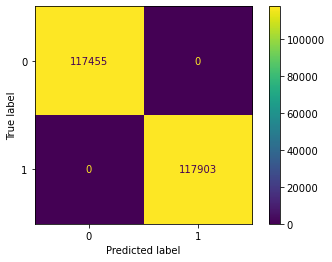

In [16]:
plot_confusion_matrix(Rf, X_train, y_train)

In [9]:
New_Rf = RandomForestClassifier(max_samples=0.75,random_state=50)
New_Rf.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = New_Rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
confusion_matrix(y_test,y_pred)

### Plotting the ROC and AUC curve

In [ ]:
probs = New_Rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1],[0,1], color='red', linestyle='--')
plt = sns.lineplot(fpr, tpr, marker = '.',label='ROC Curve')